# My First Hotdog detector

In [1]:
import keras
from keras import backend as K

Using TensorFlow backend.


We are going to learn some hotdogs! The basic tool we are going to use is a Convolutional Neural Network (CNN). CNNs have revolutionized computer vision in the last few years

In [2]:
from keras.layers import Conv2D, MaxPooling2D, InputLayer, Flatten, Dense

my_first_cnn = keras.Sequential()
my_first_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(72, 72, 3)))
my_first_cnn.add(MaxPooling2D((2,2)))
my_first_cnn.add(Conv2D(32, (3, 3), activation='relu'))
my_first_cnn.add(MaxPooling2D((2,2)))
my_first_cnn.add(Flatten())
# Until I added a second Dense layer, this was learning nothing at all!
my_first_cnn.add(Dense(128, activation='relu'))
my_first_cnn.add(Dense(64, activation='relu'))
my_first_cnn.add(Dense(1, activation='sigmoid'))

my_first_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
__________

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import os

base_dir = 'databackup/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1 / 255)
test_datagen = ImageDataGenerator(rescale=1 / 255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(72,72),
                                                    batch_size=25,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(72,72),
                                                        batch_size=25,
                                                        class_mode='binary')

Found 1550 images belonging to 2 classes.
Found 393 images belonging to 2 classes.


In [4]:
from keras.optimizers import Adam

my_first_cnn.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history = my_first_cnn.fit_generator(train_generator,
                                     steps_per_epoch=20,
                                     epochs=20,
                                     validation_data=validation_generator,
                                     validation_steps=20)

Epoch 1/20
20/20 [==============================] - 6s 303ms/step - loss: 0.6010 - acc: 0.6620 - val_loss: 0.4652 - val_acc: 0.7748
Epoch 2/20
20/20 [==============================] - 22s 1s/step - loss: 0.5368 - acc: 0.7300 - val_loss: 0.4245 - val_acc: 0.8195
Epoch 3/20
20/20 [==============================] - 5s 264ms/step - loss: 0.4833 - acc: 0.7760 - val_loss: 0.4368 - val_acc: 0.7931
Epoch 4/20
20/20 [==============================] - 6s 282ms/step - loss: 0.4420 - acc: 0.7960 - val_loss: 0.4265 - val_acc: 0.8073
Epoch 5/20
20/20 [==============================] - 5s 247ms/step - loss: 0.4076 - acc: 0.8320 - val_loss: 0.3723 - val_acc: 0.8458
Epoch 6/20
20/20 [==============================] - 5s 246ms/step - loss: 0.3778 - acc: 0.8200 - val_loss: 0.3801 - val_acc: 0.8398
Epoch 7/20
20/20 [==============================] - 6s 282ms/step - loss: 0.3642 - acc: 0.8420 - val_loss: 0.3591 - val_acc: 0.8540
Epoch 8/20
20/20 [==============================] - 6s 288ms/step - loss: 0.42

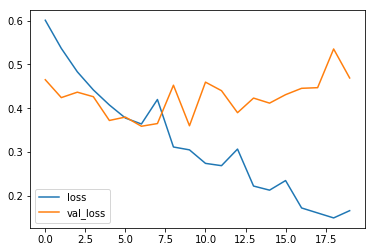

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')
plt.legend()

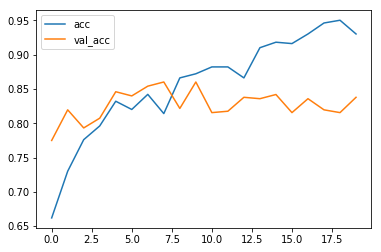

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['acc'], label='acc')
plt.plot(history.epoch, history.history['val_acc'], label='val_acc')
plt.legend()

What's happening here? We are seeing a typical case of overfitting. Our training accuracy is getting pretty good really fast, but at the same time the validation loss increases in each epoc. The network is learning the specific details of the training set, which don't generalize all that well.

One of the best pieces of advice I got from Jeremy Howard's Deep Learning for Coders is that you should first attempt to overfit, then deal with that through regularization. In my case, the first few times I tried to train this network, it was not learning anything at all - its predictions were no better than chance. Only when I added a second Dense layer in order to make it be able to fit anything at all did I get any useful results at all.

### Notes

decreasing learning rate during training: 

```
K.set_value(model.optimizer.lr, 0.001)
model(X,y,nb_epoch=50)
```

### TODOs

Try different image sizes: with 120x120 I got to around 86% accuracy before overfititng. Interestigly, with 72x72 it only a bit lower, around 85%.

Examine the predictions: the most wrong, the most right, etc.

SGD with restarts, maybe with Learning Rate Scheduler?